In [17]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [94]:
consumer_data = {}
pipe_data = {}
overall_data = {}
keys = ["0.005", "0.005k10l10", "0.005k15l15", "0.005k50l50", "0.005k10l5", "0.1k10l5", "0.005k10l2_newest", "0.005k50l30_newest"]
for key in keys:

    consumer_data[key] = pd.read_csv(f"consumer_results_{key}.csv")
    pipe_data[key] = pd.read_csv(f"results_pipe_{key}.csv")
    overall_data[key] = pipe_data[key].copy()
    overall_data[key]["ConsumerTimestamp"] = consumer_data[key]["ConsumerTimestamp"].copy()
    
    minValue = overall_data[key]["ProducerTimestamp"].loc[0]
    for column in overall_data[key].columns:
        if column == "ID":
            continue
        overall_data[key][column] = pd.to_numeric(overall_data[key][column])
        overall_data[key][column] -= minValue

In [102]:
sum(overall_data["0.005k50l30_newest"]["ProducerTimestamp"] < overall_data["0.005k50l30_newest"]["ConsumerTimestamp"])

92

In [95]:
plot_key = "0.005k10l2_newest"

((data["ExitAnonymizationTimestamp"] - data["EntryAnonymizationTimestamp"]) > (data["ExitPipeTimestamp"] - overall_data[plot_key]["EntryPipeTimestamp"])).any()


False

Median Pipe Time (s) 0.092
Median Anonymization Time (s) 0.092
Median E2e Time (s) -9.9695


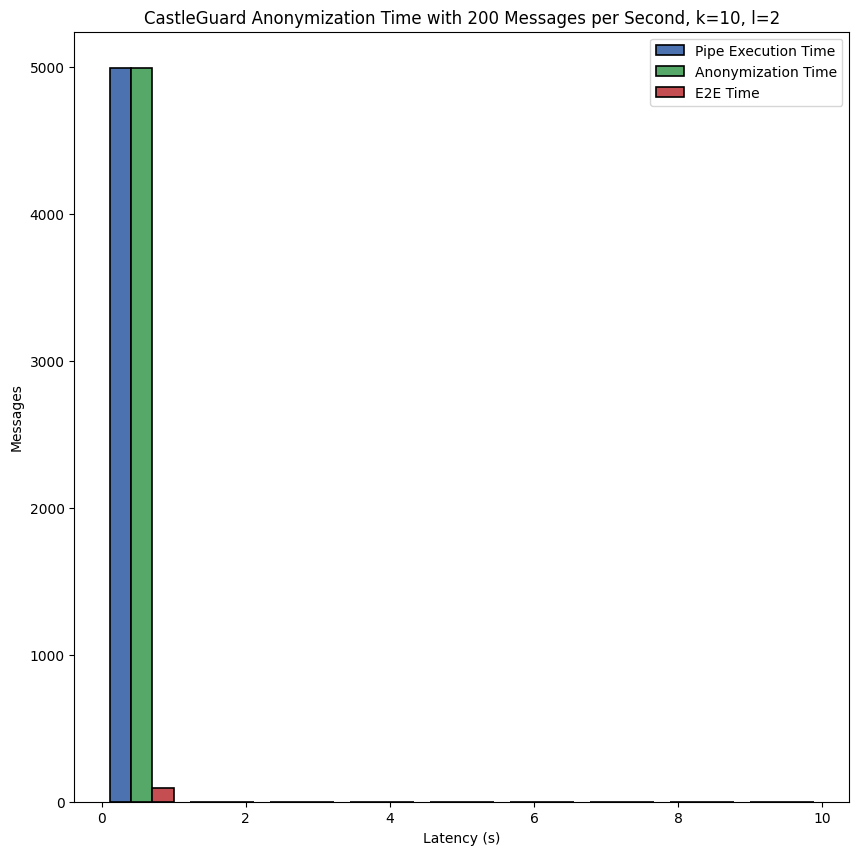

In [98]:
plot_key = "0.005k50l30_newest"
fig, ax = plt.subplots(figsize=(10,10))
# plt.plot((overall_data[plot_key]["ExitPipeTimestamp"] - overall_data[plot_key]["EntryPipeTimestamp"]) / 1000, label="pipe")
pipe_time = (overall_data[plot_key]["ExitPipeTimestamp"] - overall_data[plot_key]["EntryPipeTimestamp"]) / 1000
anonymization_time = (overall_data[plot_key]["ExitAnonymizationTimestamp"] - overall_data[plot_key]["EntryAnonymizationTimestamp"]) / 1000
e2e_time = (overall_data[plot_key]["ConsumerTimestamp"] - overall_data[plot_key]["ProducerTimestamp"]) / 1000
bins = np.linspace(0, 10, 10)
ax.hist([pipe_time, anonymization_time, e2e_time], bins, label=["Pipe Execution Time", "Anonymization Time", "E2E Time"], edgecolor='black', linewidth=1.2)
# ax.hist([pipe_time], bins, label=["Anonymization Time"], edgecolor='black', linewidth=1.2)

print("Median Pipe Time (s)", pipe_time.median())
print("Median Anonymization Time (s)", anonymization_time.median())
print("Median E2e Time (s)", e2e_time.median())


ax.set_ylabel("Messages")
ax.set_xlabel("Latency (s)")
ax.set_title('CastleGuard Anonymization Time with 200 Messages per Second, k=10, l=2')
plt.legend()

6.276344144216258


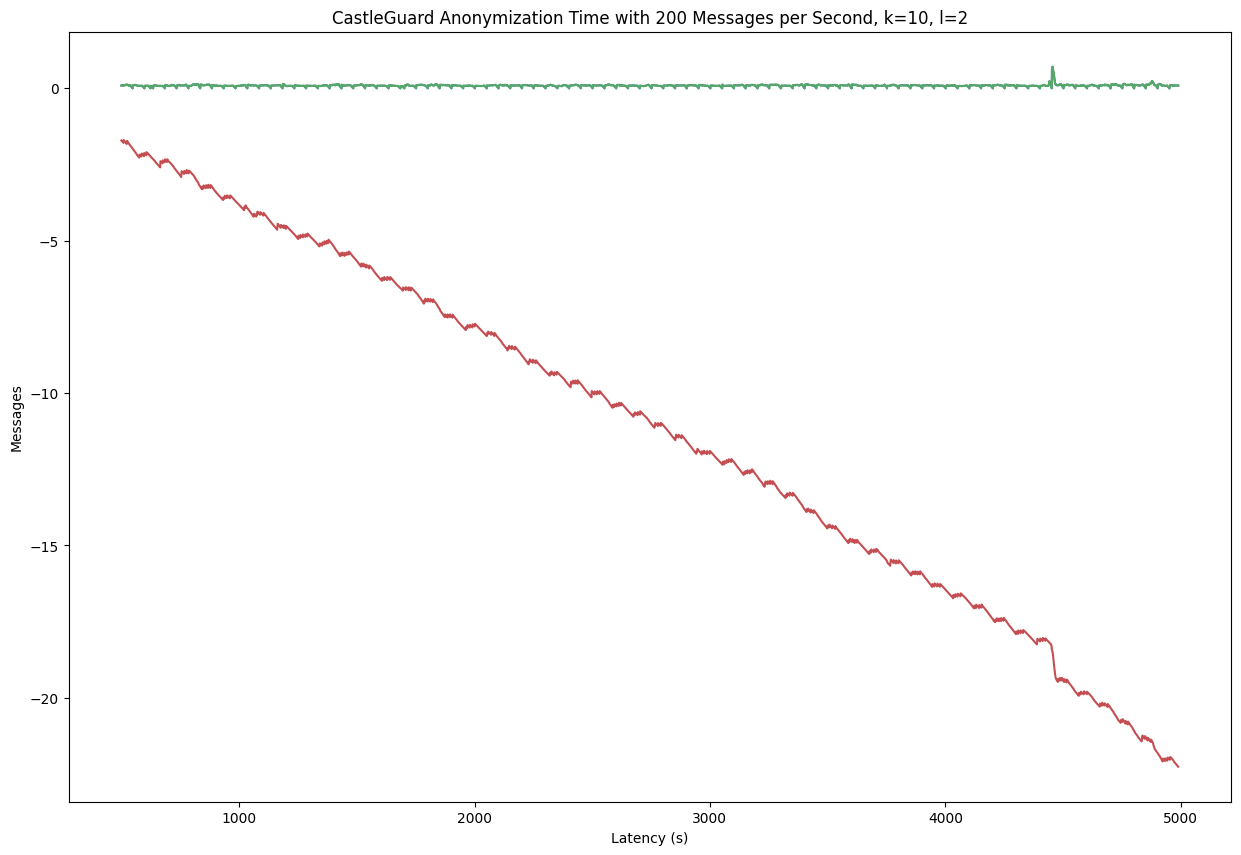

In [103]:
fig, ax = plt.subplots(figsize=(15,10))

print(e2e_time.std())

ax.set_ylabel("Messages")
ax.set_xlabel("Latency (s)")
ax.set_title('CastleGuard Anonymization Time with 200 Messages per Second, k=10, l=2')
plt.plot(anonymization_time[500:])
plt.plot(pipe_time[500:])
plt.plot(e2e_time[500:])

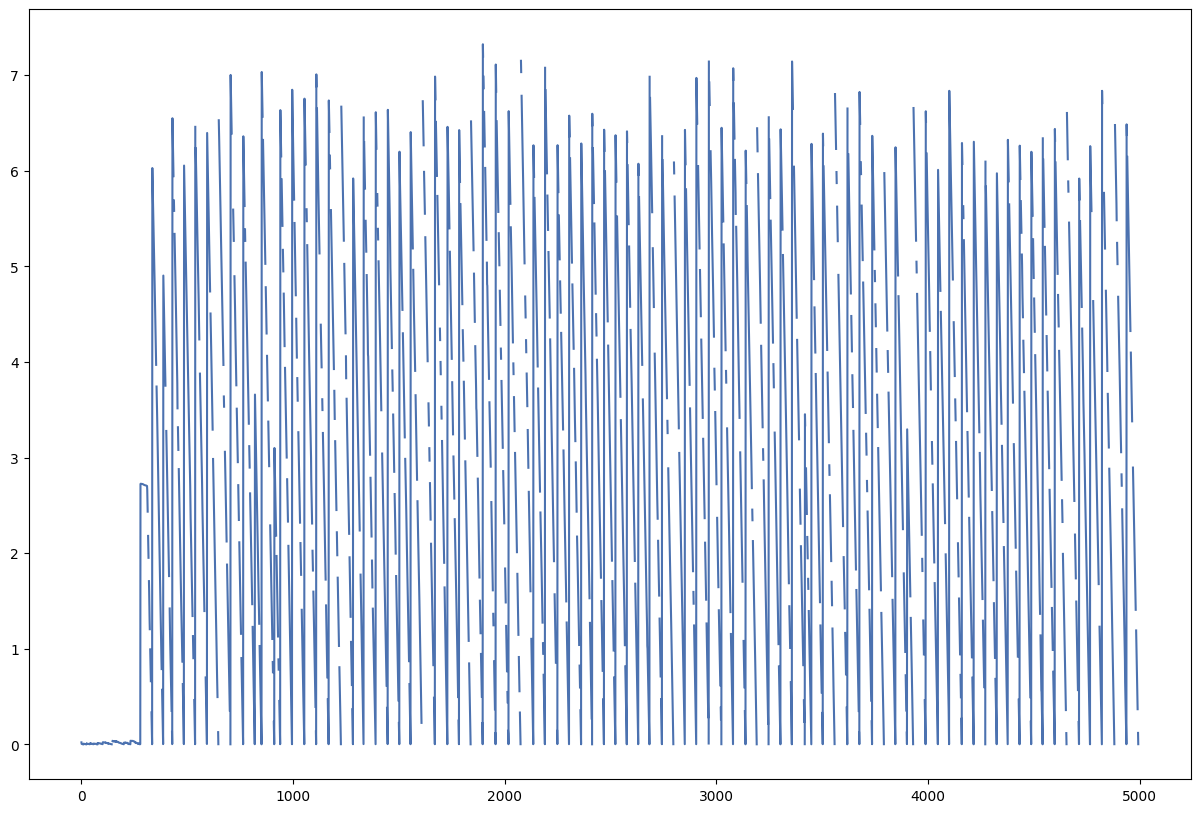

In [14]:
plt.figure(figsize=(15,10))
plt.plot((overall_data[plot_key]["ExitPipeTimestamp"] - overall_data[plot_key]["EntryPipeTimestamp"]) / 1000)


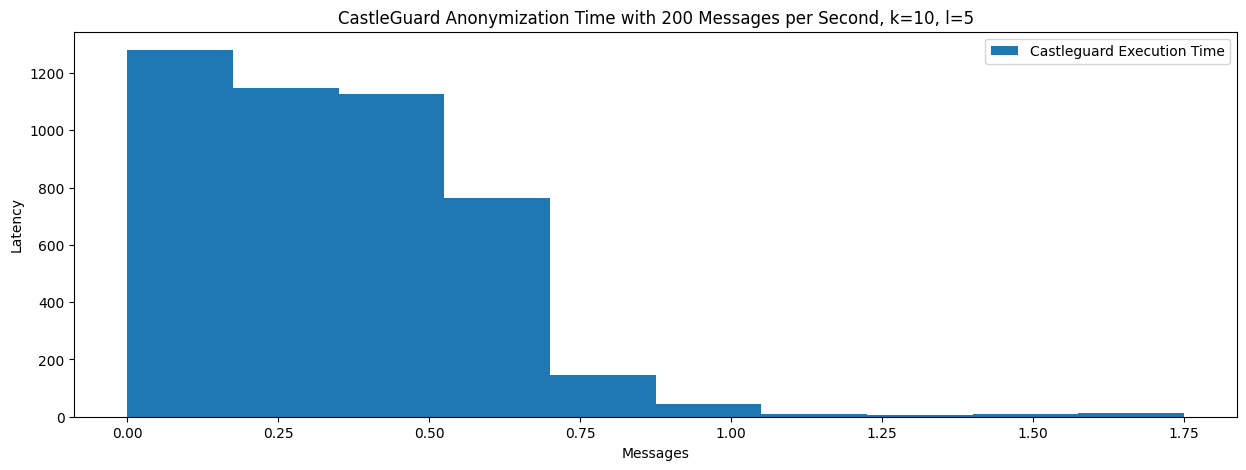

In [66]:
plot_key = "0.005k10l5"
plt.figure(figsize=(15,5))
# plt.plot((overall_data[plot_key]["ExitPipeTimestamp"] - overall_data[plot_key]["EntryPipeTimestamp"]) / 1000, label="pipe")
plt.hist((overall_data[plot_key]["ExitAnonymizationTimestamp"] - overall_data[plot_key]["EntryAnonymizationTimestamp"]) / 1000, label="Castleguard Execution Time")
plt.ylabel("Latency")
plt.xlabel("Messages")
plt.title('CastleGuard Anonymization Time with 200 Messages per Second, k=10, l=5')
plt.legend()

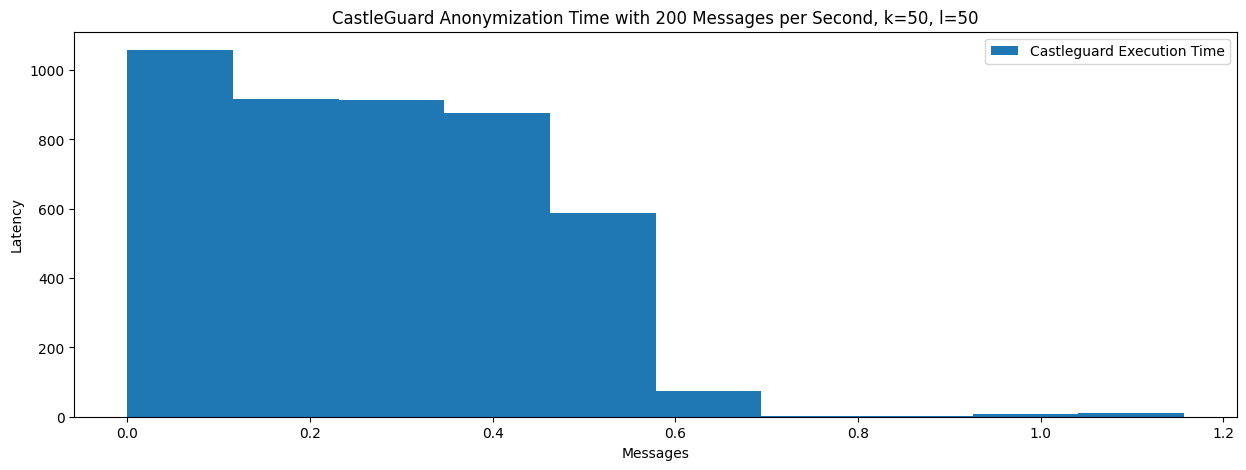

In [58]:
plot_key = "0.005k50l50"
plt.figure(figsize=(15,5))
# plt.plot((overall_data[plot_key]["ExitPipeTimestamp"] - overall_data[plot_key]["EntryPipeTimestamp"]) / 1000, label="pipe")
diff_data = (overall_data[plot_key]["ExitAnonymizationTimestamp"] - overall_data[plot_key]["EntryAnonymizationTimestamp"]) / 1000
plt.hist(diff_data, label="Castleguard Execution Time")
plt.ylabel("Latency")
plt.xlabel("Messages")
plt.title('CastleGuard Anonymization Time with 200 Messages per Second, k=50, l=50')
plt.legend()

range(203, 64530)


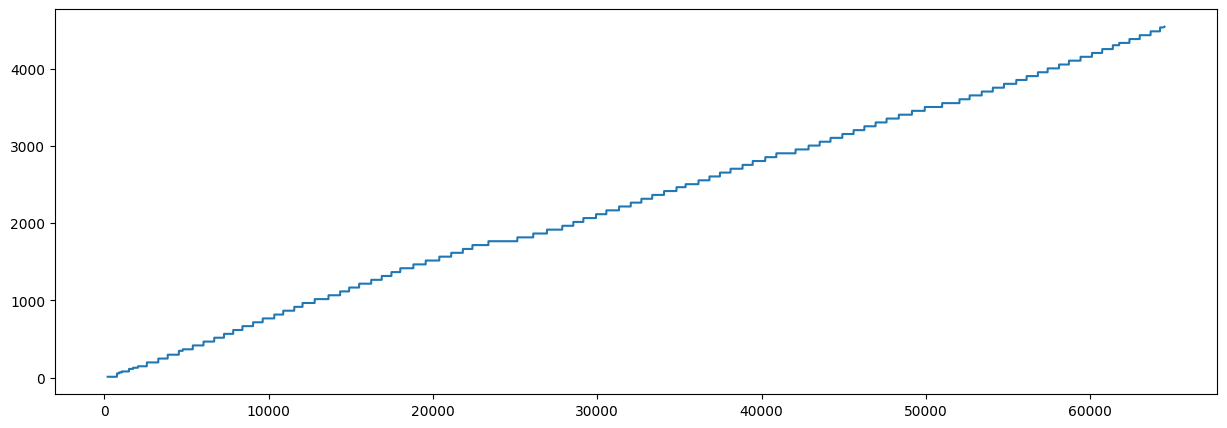

In [9]:
# throughput
cactus_key = "0.005k10l5"
plt.figure(figsize=(15,5))
timestamp_range  = range(int(overall_data[cactus_key]["ExitAnonymizationTimestamp"].min()), int(overall_data[cactus_key]["ExitAnonymizationTimestamp"].max())+1)
print(timestamp_range)
timestamp_done = {}
for timestamp in timestamp_range:
    timestamp_done[timestamp] = 0
    
for timestamp in overall_data[cactus_key]["ExitAnonymizationTimestamp"]:
    if not pd.notna(timestamp):
        continue
    timestamp_done[timestamp] += 1
    for done_timestamp in timestamp_done.keys():
        if done_timestamp > timestamp:
            timestamp_done[done_timestamp] += 1
    
results = [timestamp_done[timestamp] for timestamp in timestamp_range]
plt.plot(timestamp_range, results)

In [56]:
from glob import glob
import pandas as pd 

benchmark = dict()
for file in glob("timestamps_*.csv"):
    print(file)
    benchmark[file] = pd.read_csv(file)

timestamps_castleguard_k3l3_0.005.csv
timestamps_castleguardk3l3_0.01.csv
timestamps_castleguard_k3l3_0.01_2.csv


In [57]:
from matplotlib import pyplot as plt
import numpy as np

Median Pipe Time (s) 0.204
Median Anonymization Time (s) 0.191
Median E2e Time (s) 0.369


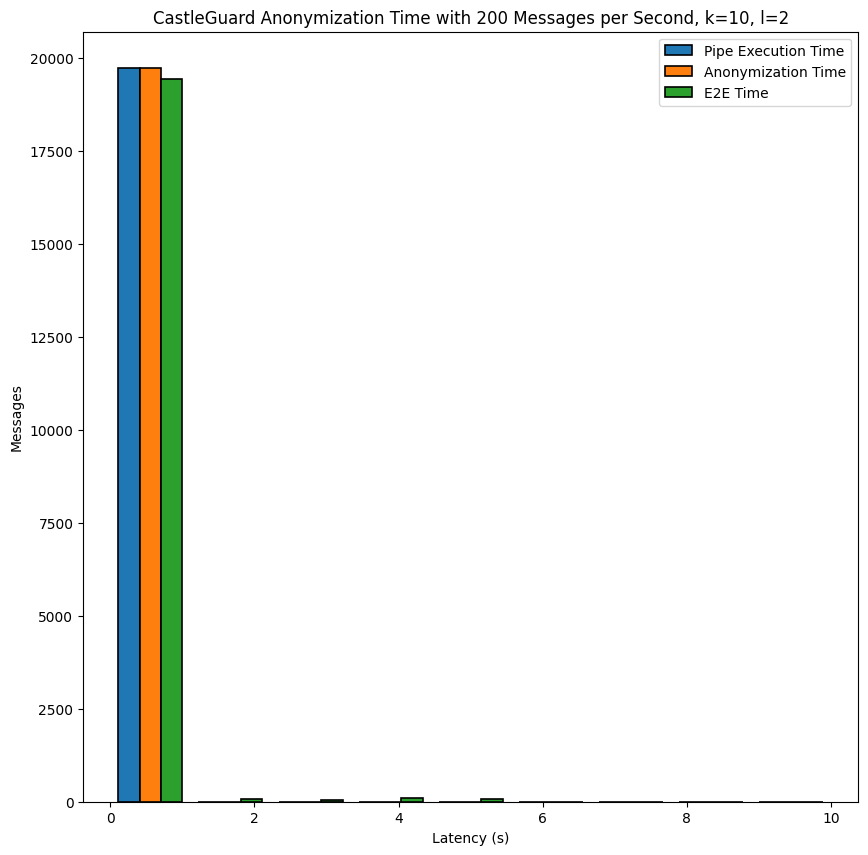

In [77]:

fig, ax = plt.subplots(figsize=(10,10))
data = benchmark["timestamps_castleguard_k3l3_0.01_2.csv"]
# plt.plot((overall_data[plot_key]["ExitPipeTimestamp"] - overall_data[plot_key]["EntryPipeTimestamp"]) / 1000, label="pipe")
def load_times(dataset):
    pipe_time = (dataset["ExitPipe"] - dataset["EntryPipe"]) / 1000
    anonymization_time = (dataset["ExitAnonymization"] - dataset["EntryAnonymization"]) / 1000
    e2e_time = (dataset["Consumer"] - dataset["Producer"]) / 1000
    return pipe_time, anonymization_time, e2e_time

pipe_time, anonymization_time, e2e_time = load_times(data)
bins = np.linspace(0, 10, 10)
ax.hist([pipe_time, anonymization_time, e2e_time], bins, label=["Pipe Execution Time", "Anonymization Time", "E2E Time"], edgecolor='black', linewidth=1.2)

print("Median Pipe Time (s)", pipe_time.median())
print("Median Anonymization Time (s)", anonymization_time.median())
print("Median E2e Time (s)", e2e_time.median())

ax.set_ylabel("Messages")
ax.set_xlabel("Latency (s)")
ax.set_title('CastleGuard Anonymization Time with 200 Messages per Second, k=10, l=2')
plt.legend()

In [122]:
import seaborn as sns
sns.set(style="whitegrid")

Text(0.5, 1.0, 'Pipe latency of a single message, k=3, l=3')

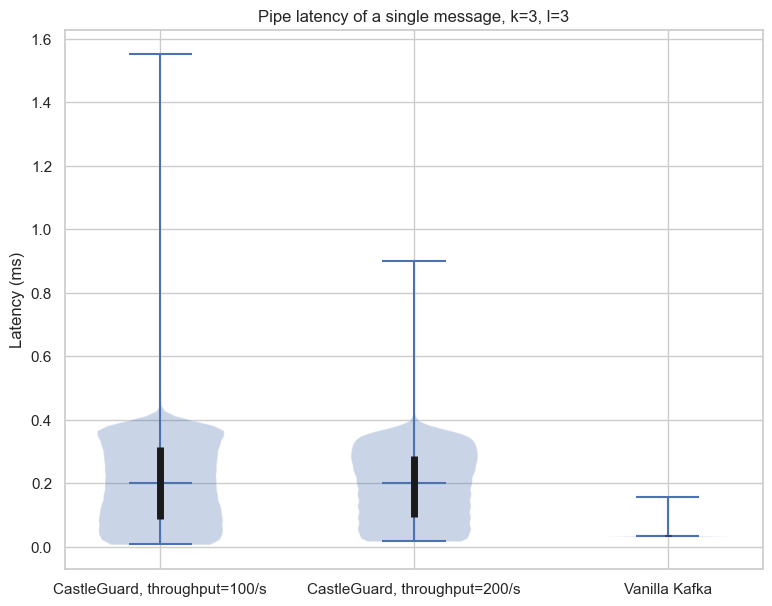

In [150]:
dataset200 = pd.read_csv("timestamps_castleguard_k3l3_0.005.csv")
kafka = pd.read_csv("timestamps_kafka.csv")
doca100 = pd.read_csv("timestamps_doca_0.01.csv")

pipe_time200, _, _  = load_times(dataset200.head(8000))
_, _, e2e_kafka = load_times(kafka.head(8000))

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

pipe_time100 = pipe_time.head(8000)

fig, ax = plt.subplots(figsize=(9,7))
times = [sorted(pipe_time100), sorted(pipe_time200), sorted(e2e_kafka)]
ax.violinplot(times, showmedians=True, showextrema=True)



quartile1, medians, quartile3 = np.percentile(times, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(times, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax.set_xticks(np.arange(1, 4), labels=["CastleGuard, throughput=100/s", "CastleGuard, throughput=200/s", "Vanilla Kafka"])
ax.set_ylabel("Latency (ms)")
ax.set_title('Pipe latency of a single message, k=3, l=3')


Text(0.5, 1.0, 'Pipe latency of a single message, delta=1')

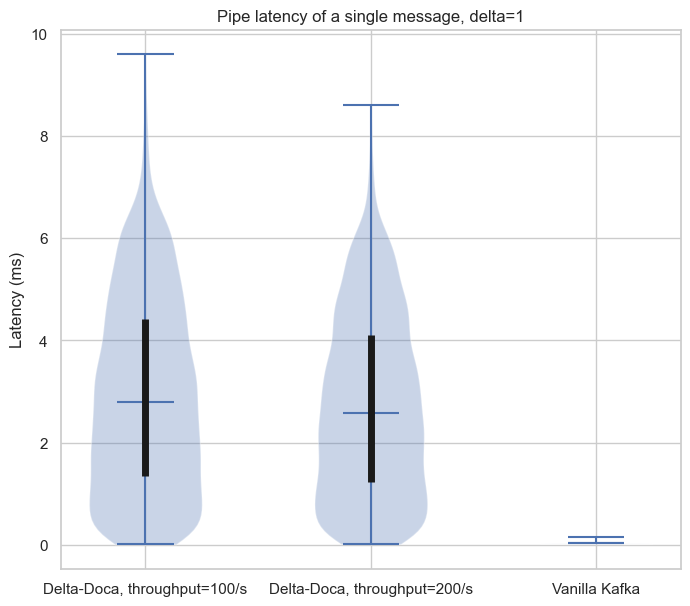

In [151]:
doca100 = pd.read_csv("timestamps_doca_0.01.csv")
doca200 = pd.read_csv("timestamps_doca_0.005.csv")
pipe_doca_time100, _, _ = load_times(doca100.head(8000))
pipe_doca_time200, _, _ = load_times(doca200.head(8000))


fig, ax = plt.subplots(figsize=(8,7))
times = [sorted(pipe_doca_time100), sorted(pipe_doca_time200), sorted(e2e_kafka)]
ax.violinplot(times, showmedians=True, showextrema=True)

quartile1, medians, quartile3 = np.percentile(times, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(times, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax.set_xticks(np.arange(1, 4), labels=["Delta-Doca, throughput=100/s", "Delta-Doca, throughput=200/s", "Vanilla Kafka"])
ax.set_ylabel("Latency (ms)")
ax.set_title('Pipe latency of a single message, delta=1')

Text(0.5, 1.0, 'Throughput with 100 Messages per Second, k=3, l=3')

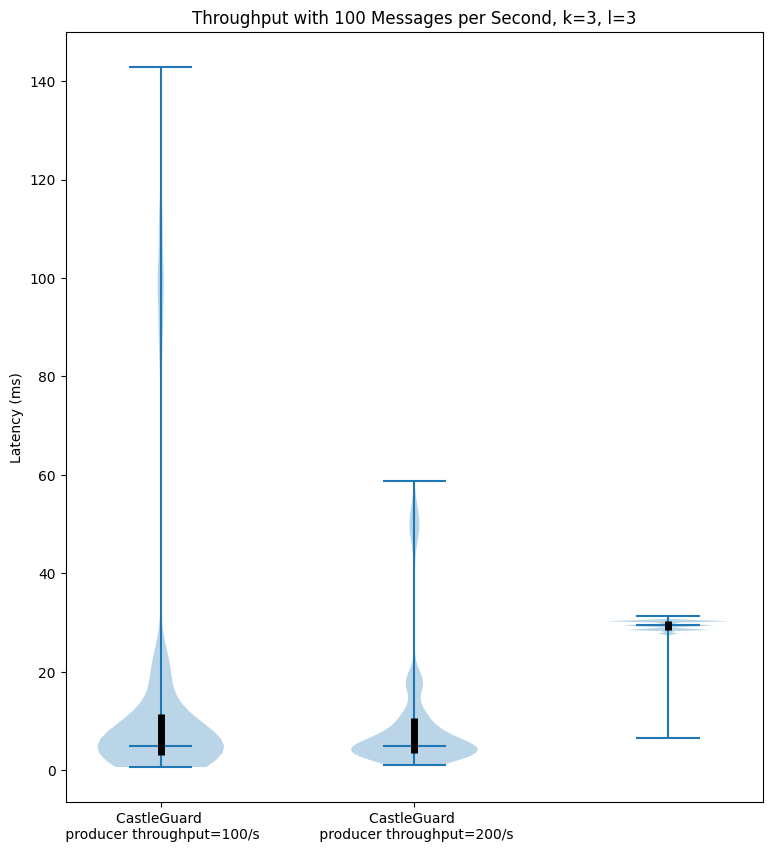

In [119]:
fig, ax = plt.subplots(figsize=(9,10))
times_inv = [sorted(1000 / pipe_time100), sorted(1000 / pipe_time200), sorted(1000 / e2e_kafka)]
ax.violinplot(times, showmedians=True, showextrema=True)

quartile1, medians, quartile3 = np.percentile(times, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(times_inv, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax.set_xticks(np.arange(1, 3), labels=["CastleGuard \n producer throughput=100/s", "CastleGuard \n producer throughput=200/s"])
ax.set_ylabel("Latency (ms)")
ax.set_title('Throughput with 100 Messages per Second, k=3, l=3')

<Axes: >

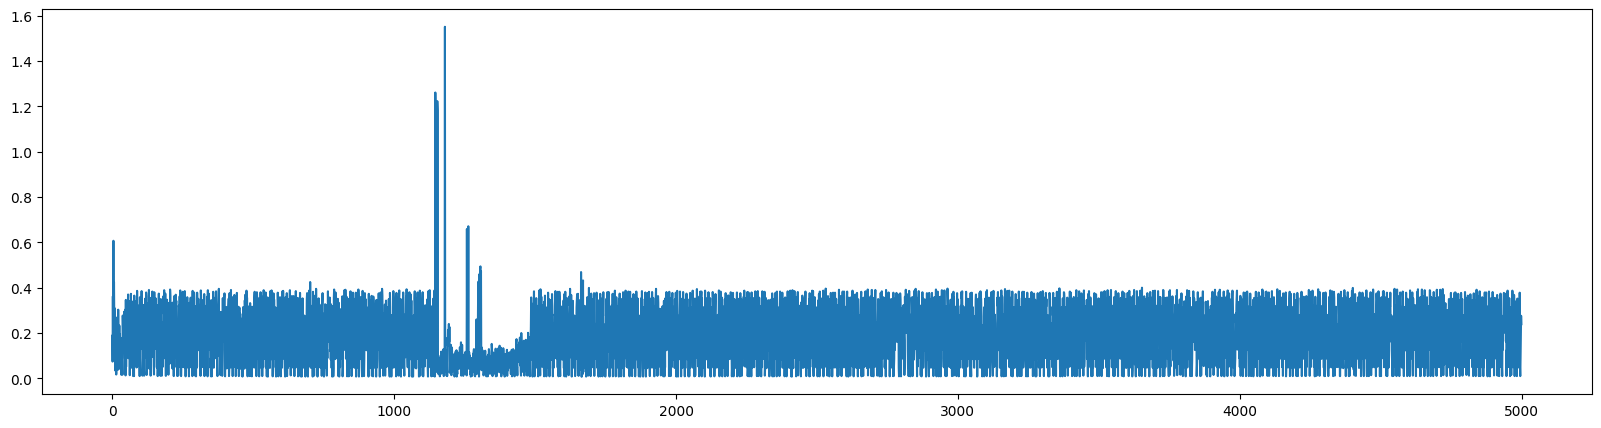

In [104]:
plt.subplots(figsize=(20,5))
pipe_time100.head(5000).plot()